In [12]:
pip install graphviz

You should consider upgrading via the '/home/guido/anaconda3/bin/python -m pip install --upgrade pip' command.
Note: you may need to restart the kernel to use updated packages.


In [9]:
import math

def entropie(a,b):
    entropie_summe = a+b
    a=a/entropie_summe
    b=b/entropie_summe
    b = (b if b== 0 else b*math.log2(b))
    a = (a if a== 0 else a*math.log2(a))
    return -(a)-(b)

In [9]:
def gewichtung(total,a,b):
    return ((a+b)/total)*entropie(a,b)

In [9]:
def gain(gesamt_entropie, attribut_entropie):
    return gesamt_entropie - attribut_entropie

In [10]:
# Aufg_11 A) Berechnung Entropie Informationsgewinn, 1. Split bei höchstem Information-Gain, hier bei Age
entropie_buycomputer = entropie(12,8)
print("Entropie buycomputer", entropie_buycomputer)

# Age
# total, Yes, No
entropie_buycomputer_age = gewichtung(20, 2, 6) + gewichtung(20, 6, 0) + gewichtung(20, 4, 2)
print("Entropie buycomputer age", entropie_buycomputer_age)
gain_age = gain(entropie_buycomputer, entropie_buycomputer_age)
print("Entropie gain buycomputer age", gain_age)

# Income
entropie_buycomputer_inc = gewichtung(20, 3, 2) + gewichtung(20, 5, 3) + gewichtung(20, 4, 3)
print("Entropie buycomputer inc", entropie_buycomputer_inc)
gain_inc = gain(entropie_buycomputer, entropie_buycomputer_inc)
print("Entropie gain buycomputer inc", gain_inc)

# credit rating
entropie_buycomputer_cred = gewichtung(20, 5, 5) + gewichtung(20, 7, 3)
print("Entropie buycomputer cred", entropie_buycomputer_cred)
gain_cred = gain(entropie_buycomputer, entropie_buycomputer_cred)
print("Entropie gain buycomputer cred", gain_cred)

# student
entropie_buycomputer_stud = gewichtung(20, 8, 1) + gewichtung(20, 4, 7)
print("Entropie buycomputer stud", entropie_buycomputer_stud)
gain_stud = gain(entropie_buycomputer, entropie_buycomputer_stud)
print("Entropie gain buycomputer stud", gain_stud)

Entropie buycomputer 0.9709505944546686
Entropie buycomputer age 0.6
Entropie gain buycomputer age 0.3709505944546686
Entropie buycomputer inc 0.9693410973956411
Entropie gain buycomputer inc 0.0016094970590274649
Entropie buycomputer cred 0.9406454496153464
Entropie gain buycomputer cred 0.03030514483932223
Entropie buycomputer stud 0.7465794181793927
Entropie gain buycomputer stud 0.22437117627527592


0.8112781244591328 -0.0 0.9182958340544896


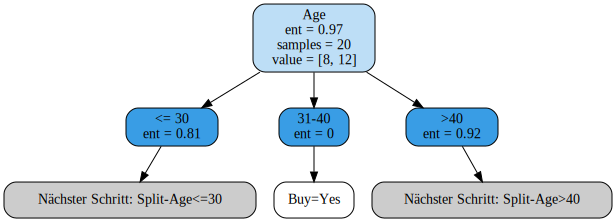

In [14]:
import graphviz

# Age subtree entropies for next splits and leave determination
entropie_buycomputer_age_equal_lower_than_30 = entropy(2, 6)
entropie_buycomputer_age_between_31_and_40 = entropy(6, 0)
entropie_buycomputer_age_higher_than_40 = entropy(4, 2)

print(entropie_buycomputer_age_equal_lower_than_30, entropie_buycomputer_age_between_31_and_40, entropie_buycomputer_age_higher_than_40)

# manually  written dot to visuzalize info
graphviz.Source("""
digraph Tree {
node [shape=box, style="filled, rounded", color="black"];
0 [label="Age\nent = 0.97\nsamples = 20\nvalue = [8, 12]", fillcolor="#399de555"];
1 [label="<= 30\nent = 0.81", fillcolor="#399de5ff"]; 0 -> 1;
2 [label="31-40\nent = 0", fillcolor="#399de5ff"]; 0 -> 2;
3 [label=">40\nent = 0.92", fillcolor="#399de5ff"]; 0 -> 3;
4 [label="Buy=Yes", fillcolor="#ffffffff"]; 2 -> 4;
5 [label="Nächster Schritt: Split-Age<=30", fillcolor="#ccccccff"]; 1 -> 5;
6 [label="Nächster Schritt: Split-Age>40", fillcolor="#ccccccff"]; 3 -> 6;
}
""")